In [24]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score

In [25]:
df = pd.read_csv('heart.csv')
df = df.drop_duplicates()

In [26]:
df = df.drop(['fbs', 'trestbps'], axis=1)

<AxesSubplot: xlabel='target', ylabel='count'>

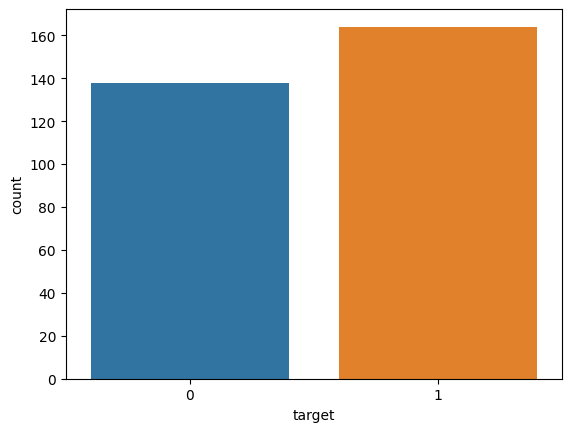

In [27]:
# target: Heart disease (1 = no, 0= yes)
sns.countplot(x = df['target'])

<AxesSubplot: xlabel='cp', ylabel='count'>

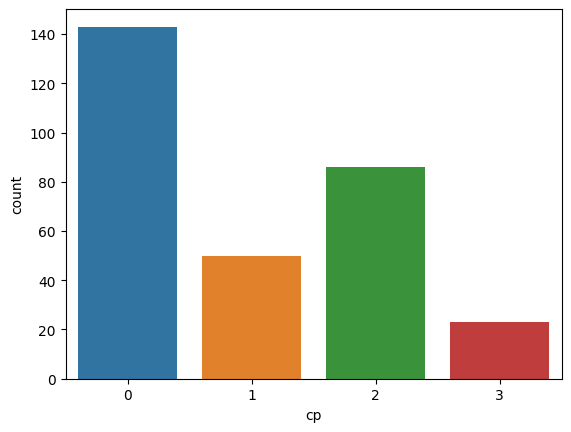

In [28]:
# cp: chest pain type
# — Value 0: asymptomatic
# — Value 1: atypical angina
# — Value 2: non-anginal pain
# — Value 3: typical angina
sns.countplot(x = df['cp'])

In [29]:
# sns.countplot(x = df['thal'])

<AxesSubplot: xlabel='sex', ylabel='count'>

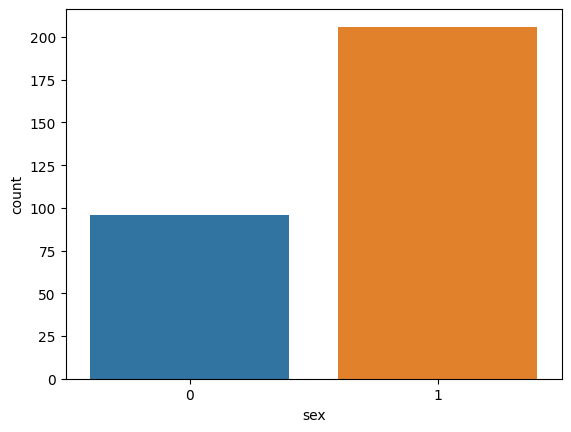

In [30]:
sns.countplot(x = df['sex'])

In [31]:
corr = df["target"].corr(df["cp"])
corr

0.43207959156640724

In [32]:
# corr = df["thal"].corr(df["target"])
corr

0.43207959156640724

In [33]:
# corr = df["thal"].corr(df["cp"])
corr

0.43207959156640724

In [34]:
x= df.iloc[:,0:13].values 
y= df['target'].values  

In [35]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [36]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

Minimum error:- 0.013157894736842105 at K = 1


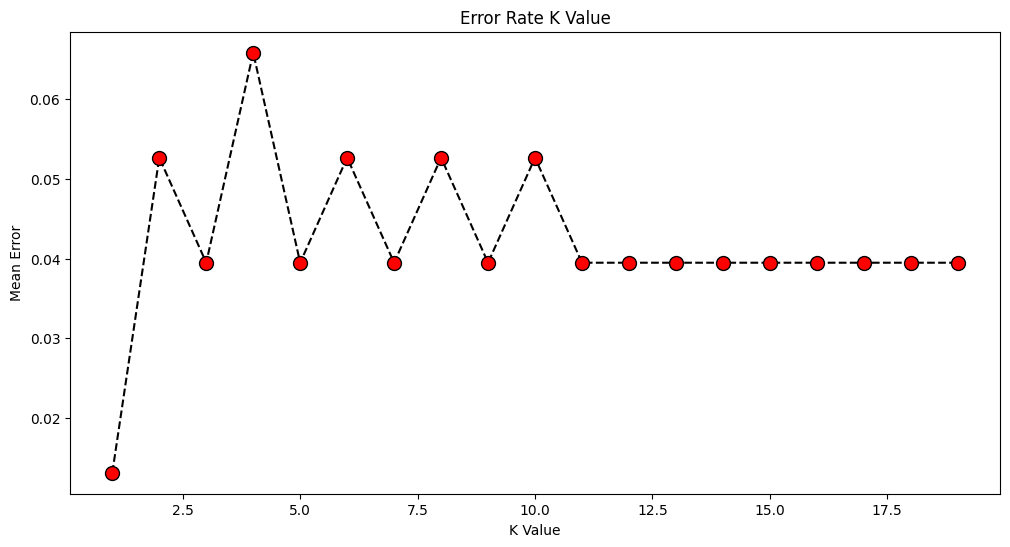

In [37]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=30)
grid_search.fit(x, y)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}
Best score: 0.7615151515151515


In [40]:
classifier= KNeighborsClassifier(n_neighbors=11)  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=11)

In [41]:
y_pred= classifier.predict(x_test)  

In [42]:
accuracy_score(y_test, y_pred)

0.9605263157894737

In [43]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(classifier, x, y,cv=5))
print((cross_val_score(classifier, x, y,cv=5)).mean())

[0.60655738 0.62295082 0.61666667 0.75       0.66666667]
0.652568306010929


In [44]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [45]:
cm

array([[31,  2],
       [ 1, 42]], dtype=int64)

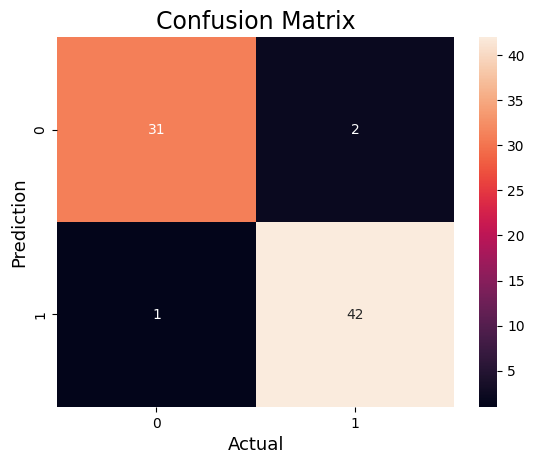

In [46]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()